In [49]:
import pandas as pd

In [50]:
path = 'https://raw.github.com/sharibhumayun/sharing-Jupyter-notebook/master/Car_Severity.csv'
df = pd.read_csv(path)

In [51]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
2,1,-122.337663,47.617510,20,330878,332378,3838086,Unmatched,Block,NaN,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
3,2,-122.328270,47.571420,24,330833,332333,EA29752,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
4,2,-122.312857,47.599218,34,320932,322432,E926429,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
import webbrowser
from folium import plugins
from imblearn.over_sampling import SMOTE

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
import webbrowser
from folium import plugins
from imblearn.over_sampling import SMOTE

In [54]:
severity_code = df['SEVERITYCODE'].values
severity_code

array([1, 2, 1, ..., 1, 1, 1])

In [55]:
#Transforming severity codes to 0 and 1
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

In [56]:
df['SEVERITYCODE'] = severity_code
severity_code

array([0, 1, 0, ..., 0, 0, 0])

In [57]:
#Descriptive Stats
descriptive_stats= df.describe(include="all")
descriptive_stats

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,66820.000000,65027.000000,65027.000000,66820.000000,66820.000000,66820.000000,66820,66820,65993,23062.000000,...,63386,63224,1175,1.0,2324,66802,63470,66820.000000,6.682000e+04,66820
unique,NaN,NaN,NaN,NaN,NaN,NaN,66820,2,3,NaN,...,9,9,1,NaN,1,53,52,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,3732736,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,1,63491,42708,NaN,...,42433,39762,1175,NaN,2324,13565,13565,NaN,NaN,59926
mean,0.308500,-122.329977,47.617946,174893.968123,237633.893460,238181.875022,NaN,NaN,NaN,40421.203452,...,NaN,NaN,NaN,12240016.0,NaN,NaN,NaN,351.973511,1.337850e+04,NaN
std,0.461878,0.029746,0.057011,31312.182883,52035.197465,52547.050321,NaN,NaN,NaN,62899.381957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4623.219152,8.530835e+04,NaN
min,0.000000,-122.419032,47.495807,6.000000,131503.000000,131503.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,12240016.0,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,0.000000,-122.347337,47.571924,157893.750000,194892.750000,194992.750000,NaN,NaN,NaN,28765.000000,...,NaN,NaN,NaN,12240016.0,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,0.000000,-122.329588,47.614009,176862.500000,229167.000000,229527.000000,NaN,NaN,NaN,30348.000000,...,NaN,NaN,NaN,12240016.0,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,1.000000,-122.311642,47.662569,196722.250000,282853.250000,283713.250000,NaN,NaN,NaN,34195.750000,...,NaN,NaN,NaN,12240016.0,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [58]:
 #Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


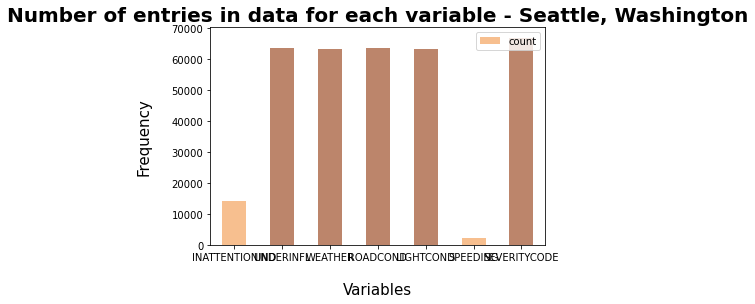

In [59]:
color_yo=['sandybrown','sienna','sienna','sienna','sienna','sandybrown','sienna']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo])
plt.title('Number of entries in data for each variable - Seattle, Washington', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

In [60]:
#Area type of each accident
explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','lightseagreen','darkorange']
addtype=df['ADDRTYPE'].value_counts()

<AxesSubplot:ylabel='ADDRTYPE'>

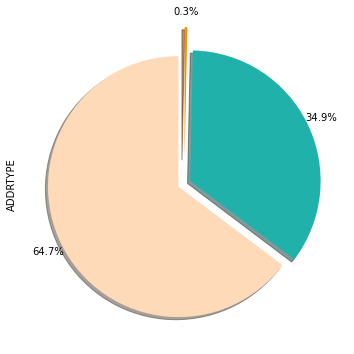

In [61]:
addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)

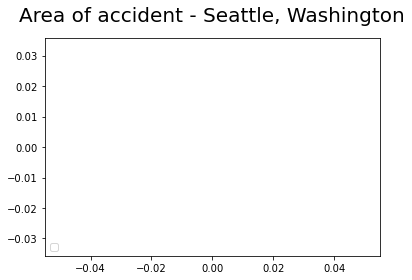

In [112]:
plt.title('Area of accident - Seattle, Washington', fontsize=20, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [63]:
#Check IncKey unqiue numbers
df['INCKEY'].nunique()

66820

In [64]:
#Encoding in attention (0 = No, 1 = Yes)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

In [65]:
#Encoding Under the influence (0 = No, 1 = Yes)
df["UNDERINFL"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

In [66]:
#Encoding Speeding(0 = No, 1 = Yes)
df["SPEEDING"].replace("Y", 1, inplace=True)
df["SPEEDING"].replace(np.nan, 0, inplace=True)


In [67]:
#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

In [68]:
#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 3, inplace=True)
df["WEATHER"].replace("Overcast", 1, inplace=True)
df["WEATHER"].replace("Other", "Unknown", inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 2, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Standing Water", 2, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df["ROADCOND"].replace("Oil", 2, inplace=True)



In [69]:
#Making new dataframe with only variables and unique keys
selected_columns=df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()
feature_stats

,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE
count,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000
mean,-122.329953,47.617987,236140.939692,0.225225,0.045035,0.035207,0.318343
std,0.029817,0.057188,51464.218440,0.417734,0.207383,0.184303,0.465837
min,-122.419032,47.495807,131503.000000,0.000000,0.000000,0.000000,0.000000
25%,-122.347399,47.571841,193982.750000,0.000000,0.000000,0.000000,0.000000
50%,-122.329585,47.614005,227817.000000,0.000000,0.000000,0.000000,0.000000
75%,-122.311541,47.662932,278321.250000,0.000000,0.000000,0.000000,1.000000
max,-122.238949,47.734142,331333.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
np.count_nonzero(feature_df['UNDERINFL'])

2763

In [71]:
 #Light Condition
lightcondsize = feature_df ["LIGHTCOND"].size
lightcondsize

61352

In [72]:
featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

In [73]:
lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

In [74]:
lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

In [75]:
feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

In [76]:
feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

In [77]:
#Road Condition
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

In [78]:
 #Weather Condition
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)



In [79]:
 #Converting remaining to int
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)


In [80]:
# ML Feature Sets
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

In [81]:
#Test/Train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (42946, 6) (42946, 1)
Test set: (18406, 6) (18406, 1)


In [82]:
!pip install imbalanced-learn

In [83]:
from imblearn.over_sampling import SMOTE

In [84]:
# Balance the Data

os = SMOTE (random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

In [85]:
#Make reduced df from feature_df to get a few random points to make map
limit = 100005
reduced_df = feature_df.iloc [0:limit:5, 0:]

In [89]:
#Folium Map
# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)
seattle_map

In [90]:
# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)
incidents

In [91]:
#Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(os_data_X,os_data_y)


DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [93]:
#Make Prediction:
yhatDT = DT.predict(X_test)
yhatDT

array([1, 0, 0, ..., 0, 0, 1])

In [94]:
 #Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))

Accuracy score for Decision Tree =  0.5521569053569488


In [95]:
 #Visualization
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))


Confusion Matrix - Decision Tree
Predicted      0     1    All
True                         
0           7549  4971  12520
1           3272  2614   5886
All        10821  7585  18406


In [96]:
print(classification_report(yhatDT,y_test))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65     10821
           1       0.44      0.34      0.39      7585

    accuracy                           0.55     18406
   macro avg       0.52      0.52      0.52     18406
weighted avg       0.54      0.55      0.54     18406



In [97]:
#COnfusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

In [104]:
plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes))
fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

IndentationError: unexpected indent (<ipython-input-104-917b34cd0db1>, line 2)

In [105]:
#Plot it
cnf_matrix = confusion_matrix(y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)

In [106]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

In [107]:
#Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(os_data_X,os_data_y)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [108]:
print(log_loss(y_test, yhat_prob))

print ("Accuracy", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))

0.6922373012121427
Accuracy 0.5569379550146691
              precision    recall  f1-score   support

           0       0.70      0.61      0.65     12520
           1       0.35      0.44      0.39      5886

    accuracy                           0.56     18406
   macro avg       0.52      0.53      0.52     18406
weighted avg       0.59      0.56      0.57     18406



In [109]:
cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)

In [110]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')


Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>